(806, 831)
190 116
Number of steps:  52498
Number of steps:  124429
Number of steps:  63188
Number of steps:  126265


(-0.5, 830.5, 805.5, -0.5)

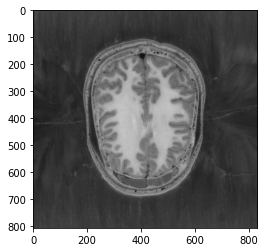

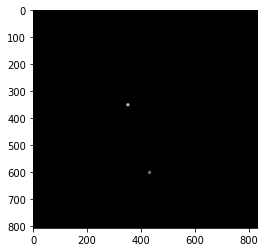

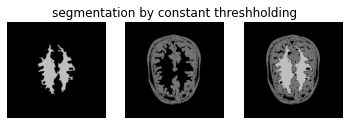

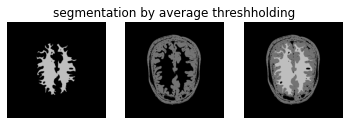

In [21]:
#question3
#1)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import turtle
COLOR=mpimg.imread('Color_MRI.png',0)
COLOR= cv.cvtColor(COLOR, cv.COLOR_BGR2GRAY)
#2)
plt.figure()
plt.imshow(COLOR,cmap='gray',vmin=0,vmax=255)
print(COLOR.shape)
Sw=(350,350)
Sg=(430,600)
seed=(Sw,Sg)
print(COLOR[Sw[0],Sw[1]],COLOR[Sg[0],Sg[1]],)
#3)
mark=np.zeros((806,831),dtype=np.uint8)

# for showing the seeds visibaly we make a circle around seeds position
mark=cv.circle(mark,(Sw[0],Sw[1]),6,190,-8)
mark=cv.circle(mark,(Sg[0],Sg[1]),6,116,-8)
plt.figure()
plt.imshow(mark,cmap='gray',vmin=0,vmax=255)
#4,5)
def region_growing(img, seeds, thresh, diffType,label):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    steps = 1
    seeds_grayscale = []
    main_grayscale=seeds_grayscale
    seeds_avg_grayscale = 0

    for seed in seeds:
        seedList.append(seed)
        seeds_grayscale.append(img[seed[0], seed[1]])
    seeds_avg_grayscale = np.average(seeds_grayscale)
    
    connects = [ (0, -1), (1, 0),(0, 1), (-1, 0)]
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)

        if (diffType == "average"):
            seeds_grayscale.append(img[currentPoint[0], currentPoint[1]])
            seeds_avg_grayscale = np.average(seeds_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label
        
        if(diffType=="constant"):
            seeds_avg_grayscale =np.average(main_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label

        for i in range(4):
            tmpX = currentPoint[0] + connects[i][0]
            tmpY = currentPoint[1] + connects[i][1]
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue

            grayDiff = abs (img[tmpX, tmpY] - seeds_avg_grayscale)

            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append((tmpX,tmpY))
        steps +=1   


    print ("Number of steps: ", steps)
    return seedMark
#6,7,8)
seg_white_cons=np.uint(region_growing(COLOR,[Sw],30,"constant",190))
seg_gray_cons=np.uint(region_growing(COLOR,[(Sg)],30,"constant",116))
seg_cons = np.uint8(seg_white_cons + seg_gray_cons)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(seg_white_cons,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(seg_gray_cons,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.title('segmentation by constant threshholding')
plt.subplot(1,3,3)
plt.imshow(seg_cons,cmap='gray',vmin=0,vmax=255)
plt.axis('off')

seg_white_avg=np.uint(region_growing(COLOR,[Sw],30,"average",190))
seg_gray_avg=np.uint(region_growing(COLOR,[(Sg)],30,"average",116))
seg_avg = np.uint8(seg_white_avg + seg_gray_avg)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(seg_white_avg,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(seg_gray_avg,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.title('segmentation by average threshholding')
plt.subplot(1,3,3)
plt.imshow(seg_avg,cmap='gray',vmin=0,vmax=255)
plt.axis('off')

